In [ ]:
# sentiment_analysis.ipynb

# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import os

# Librerie per il preprocessamento del testo
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Librerie per il machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelli di machine learning
from sklearn.linear_model import LogisticRegression

# Metriche di valutazione
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
)

# Librerie per la visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns


# Installazione di NLTK e download delle risorse necessarie
nltk.download('stopwords')
nltk.download('punkt')

# **Definizione dei nomi dei file**
reviews_filename = 'data_classification_80'
cities_filename = 'data_geomap_total'
test_filename = 'data_classification_test'  # Dataset extra che sarà utilizzato in futuro

# **Funzione per controllare e convertire i file in formato CSV se necessario**
def check_and_convert_excel_to_csv(filename):
    if not os.path.isfile(f"{filename}.csv"):
        if os.path.isfile(f"{filename}.xlsx"):
            print(f"Conversione del file {filename}.xlsx in {filename}.csv...")
            df = pd.read_excel(f"{filename}.xlsx")
            df.to_csv(f"{filename}.csv", index=False)
            print(f"File {filename}.csv creato con successo.")
        else:
            raise FileNotFoundError(f"File {filename}.xlsx o {filename}.csv non trovato.")
    else:
        print(f"Il file {filename}.csv esiste già.")

# **Controllo e conversione dei file**
check_and_convert_excel_to_csv(reviews_filename)
check_and_convert_excel_to_csv(cities_filename)
# Non controlliamo il test_filename qui perché potremmo non averlo al momento


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bartolo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bartolo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Il file data_classification_80.csv esiste già.
Conversione del file data_geomap_total.xlsx in data_geomap_total.csv...
File data_geomap_total.csv creato con successo.


# *1. Caricamento del Dataset delle Review*


In [2]:
print("\nCaricamento del dataset delle review...")
df_reviews = pd.read_csv(f"{reviews_filename}.csv")  # Dataset delle recensioni

# Visualizzazione delle prime righe del dataset
print("\nPrime righe del dataset delle review:")
print(df_reviews.head())


Caricamento del dataset delle review...

Prime righe del dataset delle review:
                                              Review  Promotore
0   Rooms are nice but for elderly a bit difficul...          0
1   My room was dirty and I was afraid to walk ba...          0
2   Cleaner did not change our sheet and duvet ev...          0
3   Good location Set in a lovely park friendly s...          1
4   Even though the pictures show very clean room...          0


# *2. Preprocessamento del Testo*

In [3]:
def preprocess_text(text):
    # Controllo per valori nulli
    if pd.isnull(text):
        return ""
    # Conversione in minuscolo
    text = text.lower()
    # Rimozione di URL ed email
    text = re.sub(r'http\S+|www\S+|https\S+|@\S+', '', text)
    # Rimozione di punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Rimozione di numeri
    text = re.sub(r'\d+', '', text)
    # Suddivisione del testo in parole utilizzando gli spazi
    words = text.split()
    # Rimozione di stopwords in inglese
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming in inglese
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]
    # Ricostruzione del testo
    text = ' '.join(words)
    return text

print("\nPreprocessamento del testo...")
df_reviews['cleaned_review'] = df_reviews['Review'].apply(preprocess_text)




Preprocessamento del testo...


# *3. Separazione delle Recensioni dalle Etichette*

In [4]:
X = df_reviews['cleaned_review']
y = df_reviews['Promotore']  # Assicurati che questa sia la colonna con le etichette 0 (Negative) e 1 (Positive)

# *4. Splitting del Dataset in Train e Test Set*


In [13]:
print("\nSuddivisione del dataset in train e test set...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Suddivisione del dataset in train e test set...


# *5. Vettorizzazione del Testo con TF-IDF*

In [14]:
print("\nVettorizzazione del testo con TF-IDF...")
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


Vettorizzazione del testo con TF-IDF...


# *6. Addestramento del Modello di Logistic Regression*

In [15]:
print("\nAddestramento del modello di Regressione Logistica...")
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_vect, y_train)


Addestramento del modello di Regressione Logistica...


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# *7. Valutazione del Modello sul Test Set*

In [16]:
print("\nValutazione del modello sul test set...")
y_test_pred = model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy sul test set: {accuracy:.4f}")


Valutazione del modello sul test set...
Accuracy sul test set: 0.9628


# *8. Classification Report per le 2 classi*

In [17]:
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_test_pred))


Classification Report sul test set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     34354
           1       0.97      0.96      0.96     34581

    accuracy                           0.96     68935
   macro avg       0.96      0.96      0.96     68935
weighted avg       0.96      0.96      0.96     68935



# *9. Elaborazione della curva ROC e Calcolo dell'AUC*



Elaborazione del grafico ROC e calcolo dell'AUC...


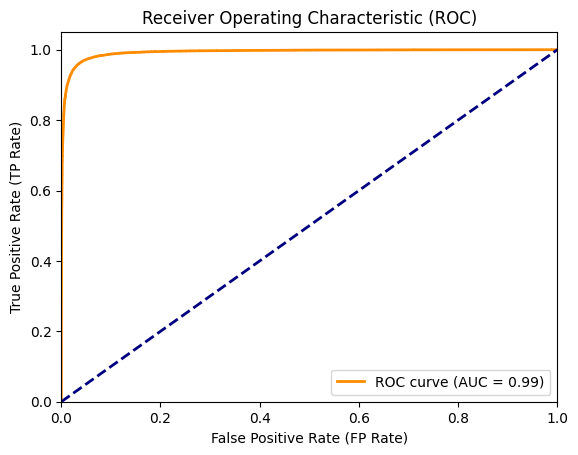


Il grafico ROC è stato salvato come 'roc_curve.png'.


In [10]:
print("\nElaborazione del grafico ROC e calcolo dell'AUC...")
y_test_proba = model.predict_proba(X_test_vect)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FP Rate)')
plt.ylabel('True Positive Rate (TP Rate)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()
print("\nIl grafico ROC è stato salvato come 'roc_curve.png'.")

# *10. Costruzione della Confusion Matrix*



Costruzione della matrice di confusione...


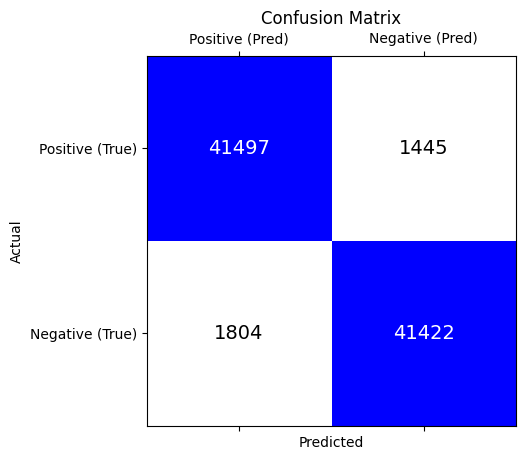

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import colors

print("\nCostruzione della matrice di confusione...")
cm = confusion_matrix(y_test, y_test_pred)
tp, fn, fp, tn = cm.ravel()

# Riorganizzazione della matrice in layout TP, FN / FP, TN
formatted_cm = np.array([[tp, fn],
                         [fp, tn]])

# Creazione della figura e degli assi
fig, ax = plt.subplots()

# Creazione di una colormap personalizzata: 0 -> bianco, 1 -> blu
cmap = colors.ListedColormap(['white', 'blue'])

# Creazione di un array per mappare i colori alle celle
# Imposta 1 per le posizioni di TP e TN (sfondo blu), 0 per FP e FN (sfondo bianco)
color_map_array = np.array([[1, 0],
                            [0, 1]])

# Visualizzazione della matrice di confusione con i colori specificati
cax = ax.matshow(color_map_array, cmap=cmap)

# Aggiunta dei valori numerici nella matrice con il colore del font appropriato
for (i, j), value in np.ndenumerate(formatted_cm):
    if color_map_array[i][j] == 1:
        text_color = 'white'  # Font bianco su sfondo blu (TP e TN)
    else:
        text_color = 'black'  # Font nero su sfondo bianco (FP e FN)
    ax.text(j, i, f'{value}', ha='center', va='center', color=text_color, fontsize=14)

# Impostazione delle etichette per righe e colonne
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Positive (Pred)', 'Negative (Pred)'])
ax.set_yticklabels(['Positive (True)', 'Negative (True)'])

# Rotazione delle etichette dell'asse x se necessario
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

# Aggiunta dei titoli degli assi
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Aggiunta del titolo
plt.title('Confusion Matrix')

# Visualizzazione del grafico
plt.show()


# *11. Verifica della disponibilità del dataset extra per la valutazione*

In [20]:
test_filename = 'data_classification_20'

check_and_convert_excel_to_csv(test_filename)
    
print("\nValutazione del modello su un dataset extra...")
df_extra = pd.read_csv(f"{test_filename}.csv")  # Dataset extra

# Preprocessamento del dataset extra
df_extra['cleaned_review'] = df_extra['Review'].apply(preprocess_text)
X_extra = df_extra['cleaned_review']
y_extra = df_extra['Promotore']  # Assicurati che questa sia la colonna con le etichette

# Vettorizzazione del dataset extra
X_extra_vect = vectorizer.transform(X_extra)

# Predizione sul dataset extra
y_extra_pred = model.predict(X_extra_vect)

# Calcolo dell'accuracy sul dataset extra
extra_accuracy = accuracy_score(y_extra, y_extra_pred)
print(f"\nAccuracy sul dataset extra: {extra_accuracy:.4f}")

Conversione del file data_classification_20.xlsx in data_classification_20.csv...
File data_classification_20.csv creato con successo.

Valutazione del modello su un dataset extra...

Accuracy sul dataset extra: 0.9634
